# Class 5

Note:  The notes that follow are largely those of Mark Krumholz (ANU) who led the Bootcamp
last in 2015.  You can find the 2015 lectures [here](https://sites.google.com/a/ucsc.edu/krumholz/teaching-and-courses/python-15)

In [1]:
# These are to display images in-line
from IPython.display import Image
from IPython.core.display import HTML

#Imports
from numpy import *
from matplotlib.pyplot import *
%matplotlib inline

Today's class is the final one in the boot camp, and it is here that we turn mainly to scientific applications of python, as opposed to general python programming. The universe of scientific applications is vast, so we will pick out a few examples of common scientific tasks that we can perform using python, numpy, and scipy.

# Root Finding
### Motivating example and statement of the problem

Our first example task is finding the solutions to algebraic equations, or, equivalently, the roots of functions. We can illustrate this example using a problem from basic astronomy. We know that the light emitted by a blackbody follows a distribution in wavelength that depends on its temperature. Specifically, we know that the distribution of intensity versus wavelength is distributed following the Planck function,

\begin{equation}
B_{x}=\left[\frac{2(k T)^{5}}{h^{4} c^{3}}\right] \frac{x^{5}}{e^{x}-1}
\end{equation}

where $\lambda$ is the wavelength, h is Planck's constant, k is Boltzmann's constant, and T is the temperature. Now suppose that we want to find the wavelength of maximum intensity for a given temperature T. This is a straightforward problem of maximizing a function, and we can solve it via the usual calculus method: take the derivative and find where it is equal to zero.

The algebra is a bit less messy if we make the substitutionv $x=hc / \lambda kT$, which makes the function we want to maximize

\begin{equation}
B_{x}=\left[\frac{2(k T)^{5}}{h^{4} c^{3}}\right] \frac{x^{5}}{e^{x}-1}
\end{equation}

Taking the derivative with respect to x, and doing a bit of simplification, we get

\begin{equation}
\frac{d B_{x}}{d x}=\left[\frac{2(k T)^{5}}{h^{4} c^{3}}\right] x^{4} \frac{(5-x) e^{x}-5}{\left(e^{x}-1\right)^{2}}
\end{equation}

We want to find the value of $x$ for which this is equal to 0, which is clearly the value of $x$ where the numerator $(5 - x)e^x - 5$ is equal to zero. We are thus left with a pure math problem: solve the equation

\begin{equation}
(5 - x)e^x - 5 = 0
\end{equation}

The difficulty is that this is a transcendental equation, which means that the equation cannot be solved analytically in an exact way. However, as we will see below, there clearly is a solution.

The problem of solving equations of this goes by the generic name of root-finding. In mathematical terms, the problem can be stated as follows. Suppose we have some function one one variable $f(x)$: for what value(s) of $x$ do we have $f(x) = 0$? In other words, what are the roots of this function?

### Graphical evaluation
A first step toward solving a problem like this is getting some sense of what the function looks like. To that end, we can fire up python, define the function, and plot it. We'll do this for both the Planck function and its derivative, omitting the leading constants in square brackets.

In [2]:
def bx(x):
    return( x**5/(exp(x)-1) )

In [3]:
def dbdx(x):
    return( x**4 * ((5-x)*exp(x)-5) / (exp(x)-1)**2 )

In [4]:
x = arange(0.01,20,0.01)

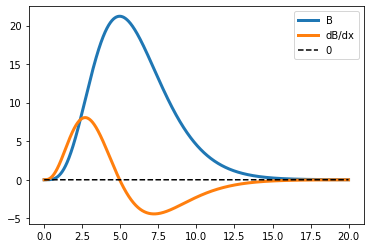

In [5]:
plot(x, bx(x), lw=3)
plot(x, dbdx(x), lw=3)
plot(x, 0*x, 'k--')
legend(['B', 'dB/dx', '0'])

The blue line is the graph of the function we want, and the green line is $f(x) = 0$. Clearly there is a solution. By eye, we can estimate that it is around $x = 5$, but we can be much more accurate than that.

One important reason to graph a function before employing these more accurate methods, however, is that a graph can often alert us if a function has more than one root. If it does, we may need to think about which root we want to find, as it is often the case that only one of the roots corresponds to a physically-realistic solution that we're interested in.

## Newton's method and the secant method

So how do we go about finding the numerical value of $x$ for which $f(x) = 0$? There are numerous numerical methods, but in this class we'll explore only two: Newton's method / the secant method, and Brent's method.

Newton's method was invented, as one might guess from the name, by Isaac Newton, and it consists of the following steps. We start with an initial guess for the root $x_0$, and at the guess we evaluate both the function and its derivative: $f(x_0)$ and $f'(x_0)$.

If the function were a straight line, then we could find the root just from this, because $f'(x_0)$ is the slope and $f(x_0)$ is the y value. The root would be at

\begin{equation}
x_1 = x_0 - \frac{f(x_0)}{ f'(x_0)}.
\end{equation}

In general our function f is not a straight line, since, if it were, all of this would be unnecessary. However, on sufficiently small scales, every smooth function looks like a straight line, so this may still be a pretty good approximation, especially if our initial guess was not too far off. To improve the approximation, we can simply repeat the procedure by using the new value $x_1$ to guess a new $x$ value $x_2$ via the same formula:

\begin{equation}
x_2 = x_1 - \frac{f(x_1)}{f'(x_1)}.
\end{equation}

We can perform this operation repeatedly until $f(x_N)$ is as close to zero as we want it to be. The [Newton's method article on wikipedia](https://en.wikipedia.org/wiki/Newton%27s_method)  has a much better graphical representation of this than I am likely to come up with, so here it is:

![NewtonUrl](https://upload.wikimedia.org/wikipedia/commons/e/e0/NewtonIteration_Ani.gif "newton")

Newton's method requires that we be able to calculate the derivative of the function $f'(x)$. This is sometimes the case, but now always. If we cannot analytically calculate the derivative, we can use a closely-related method called the second method. This is basically the same as Newton's method, with the difference that the derivative is approximated rather than computed exactly. Suppose that we take $x_0$ and $x_1$ as two initial guesses at the root. We can approximate the derivative by

\begin{equation}
f^{\prime}\left(x_{1}\right) \approx \frac{f\left(x_{1}\right)-f\left(x_{0}\right)}{x_{1}-x_{0}}
\end{equation}

We can plug this approximation into our Newton's method formula to get $x_2$, and then we can approximate the derivative $f'(x_2)$ using the values of $f(x)$ evaluated at $x_2$ and $x_1$ just as we approximated the derivative $f'(x_1)$ using the values of $f(x)$ evaluated at $x_1$ and $x_0$.

The scipy package provides implementations of both Newton's method and the secant method. To use these methods, we must first define the function whose roots we want to find. In the example above, we have already defined the function $f(x)$ that is of interest to us, so we can proceed to the next steps, which are to import the [scipy.optimize](https://docs.scipy.org/doc/scipy/reference/optimize.html) module, and then call the function [newton()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html).

The syntax is as follows:


In [7]:
import scipy.optimize as opt

opt.newton(dbdx, 5)

4.965114231744276

The newton() method takes two arguments by default. The first is the function whose root is to be found, and the second is an initial guess for the location of the root. Given this initial guess, the function will apply Newton's method or the secant method iteratively to find the root. In this case, we didn't specify the derivative of the function, and so the secant method is used. If we wanted to specify the derivative, we could do so and then use Newton's method:

In [15]:
def d2bdx2(x):
    return( 20*x**3/(exp(x)-1) - 10*x**4*exp(x)/(exp(x)-1)**2 + 2*exp(2*x)*x**5/(exp(x)-1)**3 - exp(x)*x**5/(exp(x)-1)**2 )

In [16]:
opt.newton(dbdx, 5, fprime=d2bdx2)

4.965114231744276

The function we have defined as $f'(x)$ is the analytically-computed derivative of $f(x)$. The syntax is that the optional argument fprime is set equal to the function that returns $f'(x)$. Since we have now specified $f'(x)$, the newton() function in scipy.optimize uses Newton's method instead of the secant method. The advantage of Newton's method as opposed to the second method is that it usually converges to the right answer in fewer iterations, so, if the function $f(x)$ takes a while to evaluate, Newton's method can get to the answer faster.

From the output answer, we can find the relationship between temperature and peak wavelength. Recall that we defined

\begin{equation}
x= \frac{h c}{ \lambda k T}
\end{equation}

so we can invert this to give

\begin{equation}
\lambda_{\max } T=x_{\max }(h c / k)=0.290 \mathrm{cm} \mathrm{K}
\end{equation}

where we have plugged in $x = 4.9651$. This is known as **Wien's Law**.

## Bracketed roots, the bisection method, and Brent's method

While Newton's method and the second method worked in the example we just tried, it can also run into problems, and there is no guarantee that it will find a root. Suppose that, instead of using 5 as an initial guess, we had used 0.1. Here's the result:

In [17]:
opt.newton(dbdx, 0.1)

RuntimeError: Failed to converge after 50 iterations, value is 6.922336136369824e-08.

So Newton's method failed to find the solution. What went wrong? To answer that question, we need only look at the graph of the function. Newton's method essentially amounts to saying "go downhill / uphill following the current slope", but using 0.1 as an initial guess, "downhill" actually points away from the solution, not toward it. Newton's method works well if we're close enough to the right answer that the function isn't too far from a straight line, but it will fail badly if the function is not like a straight line.

Fortunately, we can do better, if we can bracket the root. Bracketing the root means that we can identify two values a and b such that $f(a)$ and $f(b)$ have different signs meaning that the function $f(x)$ (assuming it is continuous) must pass through 0 for some $x$ between $a$ and $b$.

Bracketing a root is extremely powerful, because it enables one to use an algorithm that is guaranteed to find the root. This method is [bisection](https://en.wikipedia.org/wiki/Bisection_method). The idea of bisection is extremely simple, and can be described by the following steps:


1. Given two points $a$ and $b$ that bracket a root (i.e. $f(a)$ and $f(b)$ have opposite signs), take the halfway point between them $h = (a+b)/2$, and evaluate $f(h)$.

2. If $f(h)$ is within some specified tolerance of 0, then end -- we have found the root.

3. If not, then check if $f(h)$ and $f(a)$ have opposite signs. If they do, then there must be a root between $x = a$ and $x = h$, so set $b = h$ and go back to step 1.

4. If $f(h)$ and $f(a)$ have the same sign, then $f(h)$ and $f(b)$ must have opposite signs, because we know that $f(a)$ and $f(b)$ have opposite signs. Thus there must be a root between $h$ and $b$, so set $a = h$ and go back to step 1.

This method is guaranteed to find the root, because it always keeps the root in the interval of interest, and successively halves that interval until we are close enough.

The bisection method is guaranteed to work, but can be much slower than something like Newton's method, because it only ever gets closer to the answer by a factor of 2 per step. In contrast, if a function is fairly close to a line, Newton's method will jump very close to the answer in a single step. [Brent's method](https://en.wikipedia.org/wiki/Brent's_method) gets the best of both worlds, by trying to use secant or a similar fast method, but falling back on bisection if that doesn't converge toward the answer. It is guaranteed to converge to the right answer just like bisection, but in most cases is nearly as fast as Newton's method.

(Note: although Brent's method is guaranteed to converge *mathematically*, it may still fail to converge *numerically* because on a computer one is using finite-precision arithmetic, and there are situations where the 15 decimal places of accuracy that floating point numbers normally provide will not be enough to get to the answer within the requested tolerance. Attempting to find the root of $f(x) = e^{10000000x} - 1$ numerically is going to be problematic even with an algorithm that is mathematically guaranteed to work.)


The scipy.optimize library implements Brent's method through the routine [brentq()](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.brentq.html), and if should generally be the go-to method of solving equations if you can bracket the root. The syntax is very much like Newton's method, except that, instead of specifying an initial guess, one instead specifies the bracketing values:


In [18]:
opt.brentq(dbdx, 0.1, 100)

4.965114231743836

Here the first argument is the function whose root is to be found, the second argument is the left bracketing value ($a$), and the third argument is the right bracketing value ($b$). Even if these values are nowhere near the root (as is the case here), Brent's method will find it. Calling brentq with values for $a$ and $b$ such that $f(a)$ and $f(b)$ do not have opposite signs results in an error.

## Multi-dimensional root-finding

The problem of finding the roots of a multi-dimensional function, where there is more than one independent or dependent variable, is a significantly harder problem. In its most general form, this is the problem of finding a vector $\mathbf{x}$ satisfying the condition that $\mathbf{f}(\mathbf{x}) = 0$. The most common situation is where $\mathbf{x}$ and $\mathbf{f}(\mathbf{x})$ have the same number of elements, but in general they may have different numbers of elements.

The basic reason that this is a hard problem is that, in more than one dimension, there is no guaranteed-to-work-even-if-it-is-slow method like bisection. There is no way to bracket a root, and guarantee that it lies somewhere between point $a$ and point $b$. The situation is easiest to visualize if we imagine two superimposed landscapes there the elevations of each vary with position. We want to find a point that is at sea level in both landscapes. This is hard. For each landscape we can draw the zero-elevation contour reasonably easily, but there is no guarantee that the two sets of zero-elevation contours ever actually cross one another, and no general way to find out if and where they do.

Due to this difficulty, methods to find the roots of multi-dimensional functions are generally much more complex than those for finding the roots of scalar functions of scalar variables. Indeed, developing algorithms for solving problems of this sort is an active area of research in the field of applied mathematics.

The scipy.optimize module includes several methods for finding the roots of multidimensional functions, most of which can be accessed through the [root()](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html) function. Here's an example of using it. To start with, let us consider a two-dimensional function of two-variables, defined as follows:


In [19]:
def fvec(xvec):
    r = sqrt( xvec[0]**2 + xvec[1]**2 )
    phi = arccos( xvec[0]/r )
    fx = r**2 - 1.0
    fy = cos(phi)
    return( array([fx, fy]) )

We can see where the solutions are going to be just by looking at the function. Its first component is $r^2 - 1$, so clearly the solution must lie on the circle $r = 1$. The second component is cos(phi), so clearly the solution must lie at phi = $\pi$/2 or $(3/2)\pi$, corresponding to $x = 0$. Thus there are two solutions, one at (0, 1) and one at (0, -1).

To search for these solutions using root, we proceed as follows.

In [21]:
opt.root(fvec, [0.25, 0.5])

    fjac: array([[-0.02837482, -0.99959735],
       [ 0.99959735, -0.02837482]])
     fun: array([ 2.69748668e-11, -3.60626471e-11])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([-5.35354922e-09, -4.22230880e-09])
       r: array([-0.96382325,  0.02222859,  2.06183641])
  status: 1
 success: True
       x: array([-3.60625931e-11,  1.00000000e+00])

The first argument to root is the function whose roots are to be found, and the second argument is an initial guess at the solution. There are several keywords that control what method is used to search for the solution, and things like that. The function returns an object with a number of parts describing whether it succeeded in finding a solution, and if so where. In this example, success is True, indicating that the solver did find a solution, and x is the solution it found. In this case, it found the solution (0, 1).

# Numerical Integration

### Motivating example and statement of the problem

The second topic for today is numerical integration: using a numerical method to approximately evaluate integrals. To motivate this problem, we can return to the Planck function and the distribution of energy from a radiating black body, and ask an interesting question. Human eyes are sensitive to light over the wavelength range (roughly) 400 - 700 nm. What fraction of the Sun's light output actually occurs over this range of wavelengths. Now the Sun isn't really a blackbody, but its spectrum is close enough to being a blackbody that we can get a good rough answer by treating it as one.

The Sun's effective temperature is 5780 K, so using our definition $x = h c / \lambda k T$, plugging in the values of [Planck's constant](http://en.wikipedia.org/wiki/Planck_constant), [Boltzmann's constant](http://en.wikipedia.org/wiki/Boltzmann_constant), and the [speed of light](http://en.wikipedia.org/wiki/Speed_of_light), we find that

\begin{equation}
x=\frac{24.89}{(\lambda / 100 \mathrm{nm})}
\end{equation}

Thus the range 400 - 700 nm corresponds to $x = 3.56 - 6.22$. The distribution of energies follows the Planck function, so we are interested in knowing how the integral of the Planck function over this interval compares to the integral from 0 to infinity. In mathematical terms, we want to be able to evaluate

\begin{equation}
\frac{\int_{3.56}^{6.22} B_{x} d x}{\int_{0}^{\infty} B_{x} d x}
\end{equation}

he bottom integral can in fact be done exactly analytically (the result is $16 \pi^{6}(k T)^{5} /\left(63 h^{4} c^{3}\right)$ ), but the top integral cannot be evaluated analytically, and must instead be evaluated numerically. We can represent the problem geometrically with a simple plot:


(0, 25)

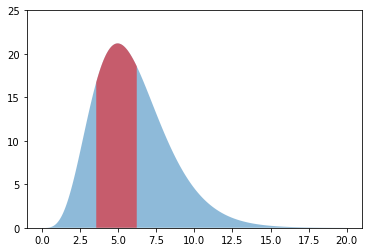

In [22]:
x1 = arange(3.56, 6.22, 0.001)

clf()
fill_between(x, bx(x), alpha=0.5)
fill_between(x1, bx(x1), alpha=0.5, facecolor='r')
ylim([0,25])

The goal is to evaluate the ratio of the purple shaded area to the total blue plus purple shaded area.

This is an example of a general problem that can be stated very simply: given a known function $f(x)$, evaluate the definite integral

\begin{equation}
\int_{a}^{b} f(x) d x
\end{equation}

over some specified interval (a,b), where a could be -infinity, and b could be +infinity.

### Quadrature of specified functions

There are numerous methods for evaluating integrals, and many of them are implemented in the [scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html) module. All of these use some variant on the idea of quadrature, which means to approximate the function using a series of other functions whose integrals are easy to evaluate. A trivial example of this is the trapezoidal rule, where one approximates the function by a series of straight lines. In these case, the shape formed by the line segment on top, the y axis on the bottom, and the vertical sides is a trapezoid, a shape whose area is trivial to calculate. The integral may therefore be approximated as the sum of the areas of a series of trapezoids.

Modern quadrature methods are much more clever than this, in that they tend to approximate each segment with somewhat higher order functions than simple lines, and that they adaptively decide where to put the breaks between the various approximate segments based on an estimate of the numerical error. The scipy routine [quad()](http://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html) implements one such sophisticated algorithm. Its use is quite simple. To evaluate the numerator of our integral, we can do


In [24]:
import scipy.integrate as integ

integ.quad(bx, 3.56, 6.22)

(53.14174673016606, 5.899919078862899e-13)

The syntax is of quad is that the first argument is the function to be integrated, the second argument is the lower limit of integration, and the third argument is the upper limit. The function returns a tuple of two numbers. The first is the value of the integral, and the second is an estimate of the absolute value of the error in the result.

The limits of integration can be plus or minus infinity, which are represented by Inf and -Inf in python. Thus to evaluate the denominator, we could do


In [25]:
integ.quad(bx, 0, Inf)

/home/bruno/pyEnvs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


(122.08116743813392, 2.0046050699847875e-07)

It is easy to verify that this matches the analytic result very precisely, with an error that is in fact much smaller than the estimate given by the quad routine:

In [26]:
integ.quad(bx, 0, Inf)[0]-8*pi**6/63

/home/bruno/pyEnvs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


4.263256414560601e-14

Thus the answer to our question, "what fraction of the Sun's light falls in the wavelength range visible to the human eye?", is


In [27]:
integ.quad(bx, 3.56, 6.22)[0] / integ.quad(bx, 0, Inf)[0]

/home/bruno/pyEnvs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


0.43529848088237094

Thus about 44% of the Sun's output falls in the wavelength range that the human eye can see. At first this might seem surprising, given how tiny a part of the spectrum we can see. Of course, however, this is no accident -- evolution would hardly select for vision in parts of the spectrum where there isn't much light to see. The eye have evolved to be exquisitely well-tuned to the light output by the Sun. We would do much less well around stars with different effective temperatures.

### Quadrature of sampled functions

In the example we just did, we had an analytic formula for the function we want to integrate. However, that is not always the case. Sometimes we only have access to the value of the function evaluated at particular points. For example, the function values might be data that were obtained experimentally rather than by an exact calculation, or they might be the result of a complex numerical calculation that we can't afford to perform a very large number of times. Obviously in this case we are not going to get as good an approximation to an integral as if we knew the function perfectly and could evaluate it wherever we wanted. However, we would still like to be able to numerically integrate such sampled functions as well as possible.

As an example, we can again take on the question of what fraction of the Sun's output energy lies in the energy range from 400 - 700 nm, but this time using a measured Solar spectrum rather than a pure blackbody. To start with, download the file [sorce_ssi.csv](https://sites.google.com/a/ucsc.edu/krumholz/teaching-and-courses/python14/class-5/sorce_ssi.csv?attredirects=0&d=1), which contains a measured spectrum of the Sun from January 1, 2010, obtained from the very useful database maintained by the [SOlar Radiation and Climate Experiment (SORCE)](http://lasp.colorado.edu/home/sorce/). This file contains three columns. The first is observation time (all the same in this file), the second is wavelength in nm, and the third is radiation flux in W/m2/nm.

Let's start by reading in this data and plotting it. We will do so using the astropy.io package:

In [30]:
from astropy.io import ascii

data = ascii.read('sorce_ssi.csv')
data.columns

<TableColumns names=('time (days since 2003-01-24)','wavelength (nm)','irradiance (W/m^2/nm)')>

The columns available are as we said: time, wavelength, and irradiance, another word for frequency-dependent flux. We can plot the latter two quantities against one another as follows:

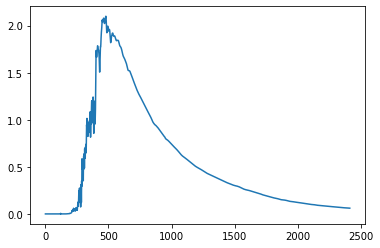

In [33]:
l = data['wavelength (nm)']
flux = data['irradiance (W/m^2/nm)']
plot(l, flux)

is is similar to our idealized blackbody, but not quite identical. To find out the fraction of the power between 400 and 700 nm, we want to integrate this function over that range, and divide by the integral of the full range.

Python provides a method to evaluate these tabulate integrals by approximating the function over each tabulation range as a parabola. This approximation method is known as Simpson's rule, and the routine that performs it is [scipy.integrate.simps()](http://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.simps.html). We can use it as follows:

In [34]:
integ.simps(flux, x=l)

1319.4359600971845

The first argument is the $y$ values of the function to be integrated, and the optional argument $x =$ lets us specify the $x$ values.

This gives the integral over the full range of the function. To get the integral over 400 - 700 nm, we need to extract just the parts of the l and flux arrays that correspond to this. In order to do this, we need to find out what indices in x correspond to values of 400 and 700. There are many ways to do this in numpy, but the easiest is probably the following:

In [35]:
l1 = l[logical_and(l>400, l<700)]
flux1 = flux[logical_and(l>400, l<700)]

Let's unpack these statements a bit. The statement l > 400 produces an array that is True wherever l is bigger than 400, and False otherwise. Similarly, l < 700 produces an array that is True wherever l is below 700, False elsewhere. Then we take logical_and(l>400, l<700), and the effect of logical_and is exactly what it sounds like: it produces True where both conditions (l>400 and l<700) are satisfied, and False elsewhere. Finally, l[logical_and(l>400, l<700)] finds the elements of l where both conditions are satisfied. Thus we've set l1 to just the elements of l that are between 400 and 700. Similarly, the second statement sets flux1 to be equal to just the elements of flux where the corresponding value of l is between 400 and 700. We can verify that this all worked ok by checking the maximum and minimum values of l1:

In [36]:
amax(l1)

698.85

In [37]:
amin(l1)

400.34

Finally, we are ready to use simps() to evaluate the integral of flux1 versus l1, and compare that to the integral of flux versus l:

In [38]:
integ.simps(flux1, x=l1) / integ.simps(flux, x=l)

0.40204419522708396

So we get 40% instead of 44% using the real Solar spectrum -- not a big difference, clearly.

### Multi-dimensional quadrature

The quadrature method we have used thus far can also be generalized to multiple dimensional integrals, although of course the cost of the evaluation goes up as the dimensionality does. This capability is provided by the functions dblquad (for 2d functions), tplquad (for 3d functions), and nquad (for arbitrary-dimensional quadratures); see scipy.integrate. We won't go over the usage of these functions in class, but they're basically analogous to what we've already done.


# Ordinary Differential Equations

### Motivating example and statement of the problem

Our final example in this class is using python to integrate ordinary differential equations. The example we will use is a simple harmonic oscillator, for example a mass on a spring. Let us consider a mass m attached to a spring with spring constant $k$. The spring is oriented horizontally, so there is no gravitational force. When the mass is displaced by a distance $x$ from the position where the spring is force-free, the restoring force exerted on the mass is $-kx$. This in turn causes the mass to accelerate with an acceleration $a = -(k/m) x$. We are interested in figuring out how the mass will move if we initially displace it some distance $x_0$ from the equilibrium position.

The first step is to write down the equations governing this system. Let $v = dx/dt$ be the velocity of the mass at any given time. The set of equations that we have to solve is then

\begin{aligned}
&\frac{d x}{d t}=v\\
&\frac{d v}{d t}=-\frac{k}{m} x
\end{aligned}


Each of these equations is an ordinary differential equation (ODE), and this pair represents a coupled pair of ODEs. Our goal is to find functions $x(t)$ and $v(t)$ that satisfy these two equations, along with the initial condition that $x(0) = x_0$ and $v(0) = 0$.

This particular set of ODEs can be solved analytically, but many others can't be. In general such a system can be written as follows. A single ODE is an equation of the form

\begin{equation}
\frac{d x}{d t}=f(x, t)
\end{equation}

where $f(x, t)$ is some arbitrary, specified function of $x$ and $t$. A set of two coupled ODEs is a pair of equations of the form

\begin{aligned}
&\frac{d x}{d t}=f(x, y, t)\\
&\frac{d y}{d t}=g(x, y, t)
\end{aligned}

where $f(x,y,t)$ and $g(x,y,t)$ are any specified functions. ODEs of this form are very common in physics, and usually instead of $y$ we have the velocity, $v$. In general a system of N ODEs takes the form

\begin{aligned}
&\frac{d x_{1}}{d t}=f_{1}\left(x_{1}, x_{2}, x_{3}, \dots, t\right)\\
&\frac{d x_{2}}{d t}=f_{2}\left(x_{1}, x_{2}, x_{3}, \dots, t\right)\\
&\frac{d x_{3}}{d t}=f_{3}\left(x_{1}, x_{2}, x_{3}, ., t\right)\\
&...
\end{aligned}

where there are N independent variables, and N specified functions $f_1$ through $f_N$. This system of equations requires a set of $N$ initial conditions, which are most commonly of the form $x_i(0) = x_{i,0}$.

## Solving ODEs in python

There are an immense number of standard methods for solving ODEs, and scipy provides an interface to a powerful and general ODE solver. As with integration, the first step is to define the function specifying the equations to be integrated. Specifically, we need to provide a function that gives the right-hand sides of the above equations, that is the derivatives of $x$ and $v$ with respect to time. We can enter this as



In [39]:
def derivs(xv, t, k, m):
    x = xv[0]
    v = xv[1]
    dxdt = v
    dvdt = -(k/m)*x
    return( [dxdt, dvdt] )

The form of this function has to be as follows. The first argument is an array giving all the dependent variables to be integrated in time. In this case, our two dependent variables are $x$ and $v$, so we get an array of two elements, the first one being $x$ and the second one being $v$. The second argument of derivs is the time $t$. We don't actually need the time in this case, but we get it anyway because in general the derivatives might depend on time. Then finally we have any additional arguments we need. In this case the additional arguments are the spring constant $k$ and the mass $m$.

The function must then return an array giving the derivatives of the two dependent variables. Thus the function has to return $dxdt$ and $dvdt$. The function we have written calculates these from the equations we are trying to solve.

Once we've entered the function, the next thing to do is to specify the initial conditions. In this example, since there are two dependent variables, $x$ and $v$, we need to give the initial values of $x$ and $v$. As we described the problem, the initial position is displaced from $x = 0$ by some amount, which for this example we can take to be 1, and the initial velocity is zero. Thus we say

In [40]:
xv0 = [1, 0]

The third step is to decide at what times we'd like to know the position and velocity. Thus is up to us, but for this example let's say we'd like to know the position at intervals of 0.1 seconds for 20 seconds. We will create an array specifying these times:

In [41]:
t = arange(0, 20, 0.1)


Finally, we need to choose values for the mass and spring constant. Let's choose a mass of 1 kg, and a spring constant of 2 N/m. Thus

In [42]:
k = 2.
m = 1.

Now we're finally ready to integrate. We use the function [odeint()](http://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) as follows: 

In [43]:
output = integ.odeint(derivs, xv0, t, args=(k, m))

The first argument is the function specifying the derivatives, the second is the initial conditions, the third is the set of times at which we want to know the position and velocity. Finally, the optional argument args specifies the additional arguments (in this case $k$ and $m$) that are to be passed to the derivs function. 

The odeint routine returns at output that consists of the position $x$ and velocity $v$ at every time we asked for. The shape is

In [44]:
output.shape

(200, 2)

Thus output is a 200 x 2 array. To plot the position versus time and velocity versus time, we can do

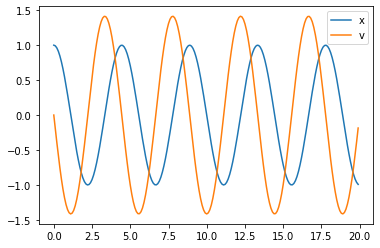

In [45]:
clf()
plot(t, output[:,0])
plot(t, output[:,1])
legend(['x', 'v'])

Thus the position and velocity both undergo sinusoidal oscillations, $\pi/2$ out of phase, as we expect for this simple harmonic oscillator.